# Instructions

## Section A
A dataset that comprises product reviews aggregated from the abillion app has been provided. Use this dataset to conduct an analysis (with appropriate data visualisation), and generate insights for abillion's product and/or business teams. You are encouraged to generate features from unstructured text data, and/or use external data sources to augment your analysis.

Submission:
1. 2-3 interesting observations with appropriate visualisations
2. All codes used for data analysis and visualisation


## Section B

Given your experience on the app, what are some new features or feature enhancements (that involve data) you can think of? How might you go about implementing this feature?

In [1]:
from google.colab import files
uploaded = files.upload()

Saving assessment_dataset.csv to assessment_dataset.csv


In [2]:
# Reviews dataset
import pandas as pd
reviews = pd.read_csv('assessment_dataset.csv')

---

# Section A - Analysis

## Basic infomation from the dataset

In [3]:
pd.set_option('max_colwidth', 150)
reviews.head(10)

,reviewText,reviewBrand,brandCategory,country,reviewDate,likesCount,commentsCount
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elparaisodelosanimales,4018,food,Argentina,2021-01-20 06:12:16.975,2.0,0
1,"No sé si es la más cremosa pero está rica. Tira a ser de las más caras pero para mi lo vale, está fortificada y eso está bueno. Yo la tomo con el ...",4568,food,Argentina,2021-02-25 16:12:00.830,15.0,0
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,3485,food,South Africa,2021-03-03 10:56:34.895,2.0,0
3,"Es una salsa más salada que picante, pero el picor es tenue y en general me pareció un sabor agradable. \n\n#vegan #elparaisodelosanimales #granji...",2290,food,Mexico,2021-03-04 22:19:59.747,0.0,0
4,"a couple of these biscuits proves 3 gram protein, 3 grams fiber, and 10% DV for Thiamin, Riboflavin, Niacin, B6, Iron. #cinnaMonday",234,food,NaN,2021-01-11 17:47:20.337,1.0,0
5,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk. #vegansmoothie #smoothie #abillio...,5132,food,Singapore,2021-02-12 00:30:24.653,10.0,0
6,"The flavor isn’t my favorite but considering it only has three ingredients and no added sugar it’s quite tasty. Works well for recipes, used it fo...",1039,food,Slovenia,2021-02-26 10:01:49.506,11.0,0
7,Leaves my dry from smooth and soft and it's scented lovely,15349,health and beauty,Sweden,2021-03-16 17:57:47.925,2.0,0
8,Almond milk made in Spain. The taste is really good and the package is cute. #ditchdairy \n#abillinlove,368,food,NaN,2021-02-12 12:32:34.790,4.0,0
9,"Baileys pero con almendra en lugar de leche, está muy bueno",62,food,Spain,2021-01-01 18:33:49.526,0.0,0


In [4]:
# Let's have a look at its shape first
print("This dataset contains {} rows and {} columns".format(
    reviews.shape[0], reviews.shape[1]))

This dataset contains 5000 rows and 7 columns


In [5]:
# Let's gather some information of the dataframe
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewText     5000 non-null   object 
 1   reviewBrand    5000 non-null   int64  
 2   brandCategory  5000 non-null   object 
 3   country        4787 non-null   object 
 4   reviewDate     5000 non-null   object 
 5   likesCount     5000 non-null   float64
 6   commentsCount  5000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 273.6+ KB


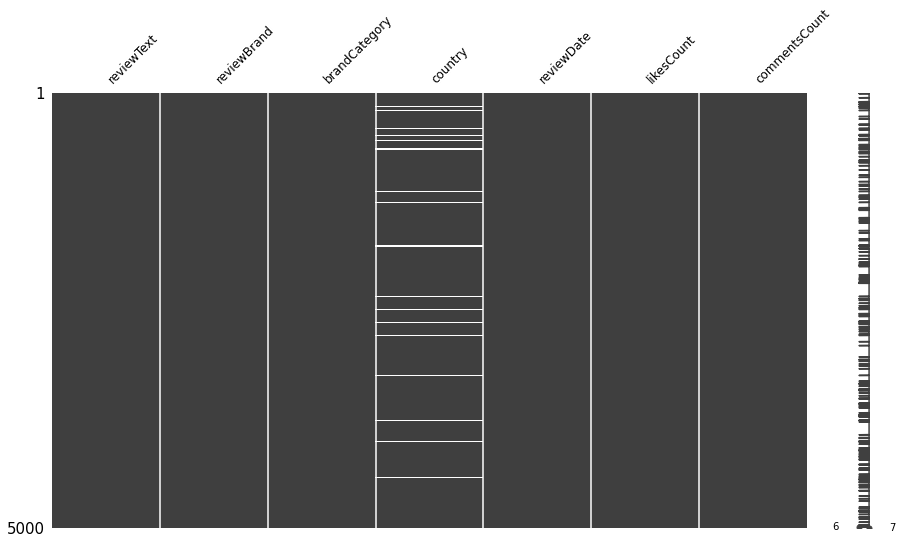

In [6]:
# We can also plot the completion using Missingno
import missingno as msno

_ = msno.matrix(df=reviews, figsize=(15,8), fontsize=12)

Only 'country' column has missing values.

In [7]:
# Let's have a look at the different countries
reviews['country'].unique()

array(['Argentina', 'South Africa', 'Mexico', nan, 'Singapore',
       'Slovenia', 'Sweden', 'Spain', 'United Kingdom', 'Uruguay',
       'United States', 'Canada', 'Lebanon', 'Portugal', 'India',
       'Germany', 'Malaysia', 'Italy', 'Cyprus', 'Austria', 'Israel',
       'Vietnam', 'Switzerland', 'Australia', 'Costa Rica', 'Ireland',
       'Chile', 'Finland', 'France', 'Norway', 'Saudi Arabia',
       'Netherlands', 'Bulgaria', 'Malta', 'Colombia', 'Belgium',
       'Poland', 'Romania', 'Hong Kong', 'Greece', 'Ecuador', 'Croatia',
       'Czechia', 'Turkey', 'Lithuania', 'Philippines', 'Japan',
       'Denmark', 'Bolivia', 'New Zealand', 'Panama', 'Hungary',
       'Mauritius', 'Nicaragua', 'Brazil', 'Peru', 'Dominican Republic',
       'Indonesia', 'Slovakia'], dtype=object)

In [8]:
# How many different 'reviewBrand' are there?
len(reviews['reviewBrand'].unique())

2684

In [9]:
# Since I do not know the meaning of this variable and there are so many 
# different values, I will not use it here.
# Might be useful/used with more explanations.
reviews_df = reviews.drop(columns=['reviewBrand'])

In [10]:
# Let's see which languages do we have for the missing countries
reviews_df[reviews_df['country'].isnull()].sample(10, random_state=3)

,reviewText,brandCategory,country,reviewDate,likesCount,commentsCount
4208,"Me fascinó esta mayo, sobre todo para acompañar los esquites 🤤 🌽 #granjitatyh",food,NaN,2021-03-31 04:16:13.432,1.0,0
4807,"A pizza from Amy’s brand from the grocery, and I top it with Daiya cheese",food,NaN,2021-01-06 01:42:29.106,1.0,0
3402,"Con mucha proteína, puedes añadir un puñado a tus guisos cuando estén cociendo y les da un toque genial.",food,NaN,2021-01-09 09:56:51.988,1.0,0
4112,"I think I’ve only reviewed the smoked version of this. But the naked tofu was on offer in Tesco so I went for it! Honestly it’s just as good, I lo...",food,NaN,2021-01-26 19:53:02.375,18.0,5
2558,"Mini tostaditas con alto contenido en proteínas y sabor a romero y sal marina. Muy salados para mi gusto, por lo demás están muy ricos.",food,NaN,2021-03-05 14:36:28.474,2.0,0
4419,"Alto pan para unas hamburguesas vegetales. Muy buen sabor y textura. Salvo los que tienen queso, los demás gustos de esta marca son aptos vegan.",food,NaN,2021-02-03 13:34:33.073,2.0,0
2488,"Night cream for sensitive skin. I really like the texture, works very well on my skin. \n#veganuary",health and beauty,NaN,2021-01-16 00:00:01.960,8.0,0
1790,Se pueden comprar en Lidl. Genial para desayunos con leche caliente se ablandan y están muy ricos,food,NaN,2021-02-19 20:51:41.563,1.0,0
1199,"Factor is HelloFresh's new ready-made meal company, and it has vegan options, like this one, which is delicious. The mushrooms mix perfectly with ...",food,NaN,2021-02-21 13:51:27.481,3.0,0
3341,Quick bake oat biscuit premix with vegan instructions! I added banana (for egg) and vegan Flora. Tasty!,food,NaN,2021-03-06 12:04:28.862,1.0,0


In [11]:
# It seems that there is a mix of languages.
# There are also some emojis and hashtags.
# Before making a decision, I will plot the different columns and see 
# wether there is a difference for rows with and without a country.
with_country = reviews_df[~reviews_df['country'].isnull()]
without_country = reviews_df[reviews_df['country'].isnull()]

In [12]:
# What are the different 'brandCategory' available
reviews_df['brandCategory'].unique()

array(['food', 'health and beauty', 'apparel'], dtype=object)

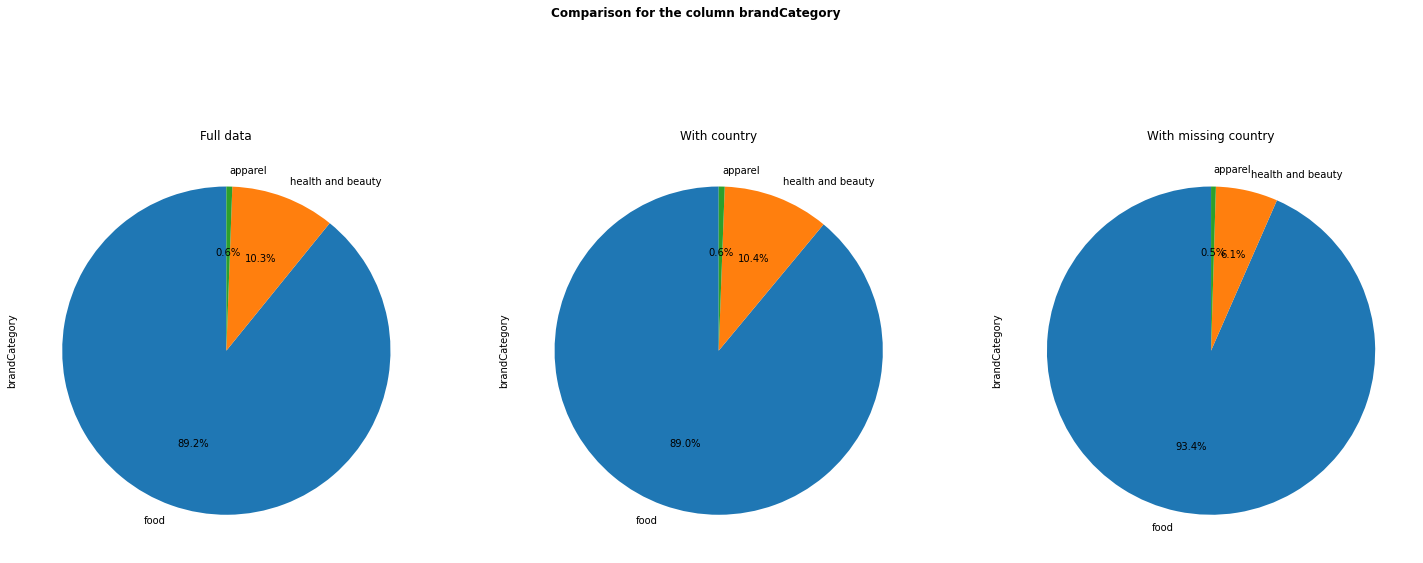

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(25,10))

reviews_df['brandCategory'].value_counts(normalize=True).\
  plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Full data')
with_country['brandCategory'].value_counts(normalize=True).\
  plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('With country')
without_country['brandCategory'].value_counts(normalize=True).\
  plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[2])
ax[2].set_title('With missing country')

fig.suptitle('Comparison for the column brandCategory', fontweight ='bold')
fig.show()

The majority of the reviews are about food.

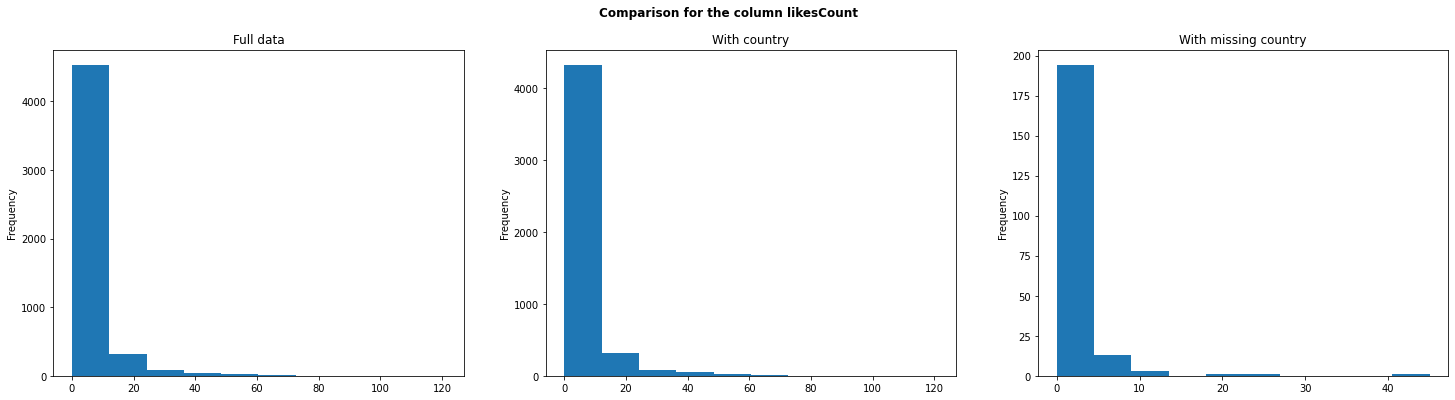

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

reviews_df['likesCount'].plot(kind='hist', ax=ax[0])
ax[0].set_title('Full data')
with_country['likesCount'].plot(kind='hist', ax=ax[1])
ax[1].set_title('With country')
without_country['likesCount'].plot(kind='hist', ax=ax[2])
ax[2].set_title('With missing country')

fig.suptitle('Comparison for the column likesCount', fontweight ='bold')
fig.show()

There seem to be some outliers (meaning a few reviews got a lot of likes), maybe the posts from abillion?

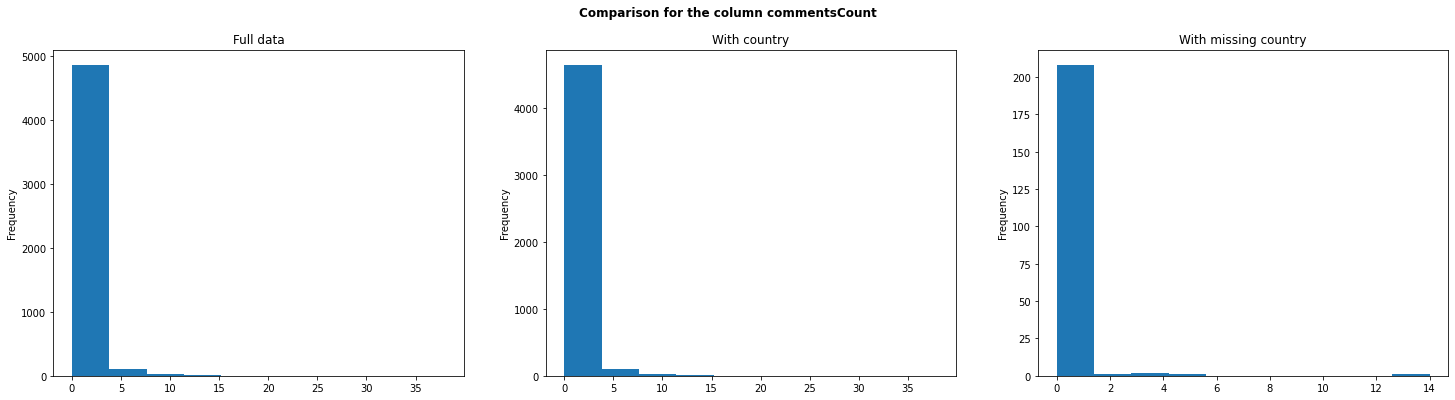

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

reviews_df['commentsCount'].plot(kind='hist', ax=ax[0])
ax[0].set_title('Full data')
with_country['commentsCount'].plot(kind='hist', ax=ax[1])
ax[1].set_title('With country')
without_country['commentsCount'].plot(kind='hist', ax=ax[2])
ax[2].set_title('With missing country')

fig.suptitle('Comparison for the column commentsCount', fontweight ='bold')
fig.show()

Same comment as above.

In [16]:
# For the sake of simplicity, and since it shouldn't impact much,
# I'll just discard these rows for now. 
# Might review them if needed, by encoding them as 'No_country' for instance.
# This is 213 rows, so about 4% of the initial data.
reviews_df_nonan = reviews_df[~reviews_df['country'].isnull()]

# Let's also reset the index
reviews_df_nonan.reset_index(drop=True, inplace=True)

## Work on column 'country'

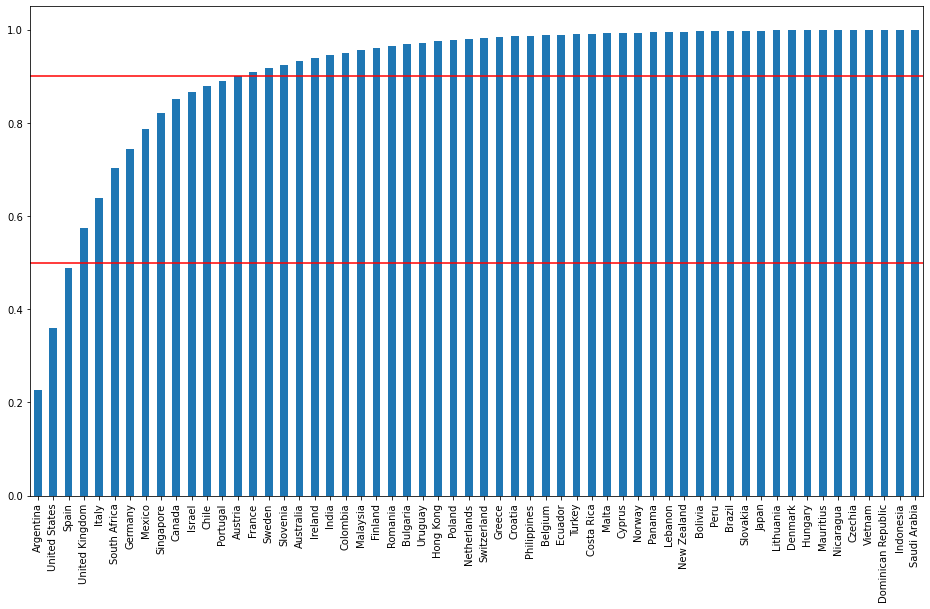

In [17]:
# Let's now plot the repartition by country
reviews_df_nonan['country'].value_counts(normalize=True).cumsum().\
  plot(kind='bar', figsize=(16,9))
plt.axhline(y=0.5, color='r', linestyle='-')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

We see that almost a quarter of the data comes from Argentina alone, and almost 50% come from only 3 countries.

By setting a threshold at 90% (where the percentage of representation seems very small), we see that we can 'eliminate' some not well represented countries, narrowing the list of interesting countries to 14 countries (I'll just keep the data from France by curiosity, making it 15 countries).

In [18]:
# Let's create the list of considered countries
keep_countries = ['Argentina', 'United States', 'Spain', 'United Kingdom', 
                  'Italy', 'South Africa', 'Germany', 'Mexico', 'Singapore', 
                  'Canada', 'Israel', 'Chile', 'Portugal', 'Austria', 'France']

In [19]:
# Now, let's replace the others countries with 'Other'
reviews_df_nonan.loc[~reviews_df_nonan['country'].
                     isin(keep_countries), 'country'] = 'Other'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


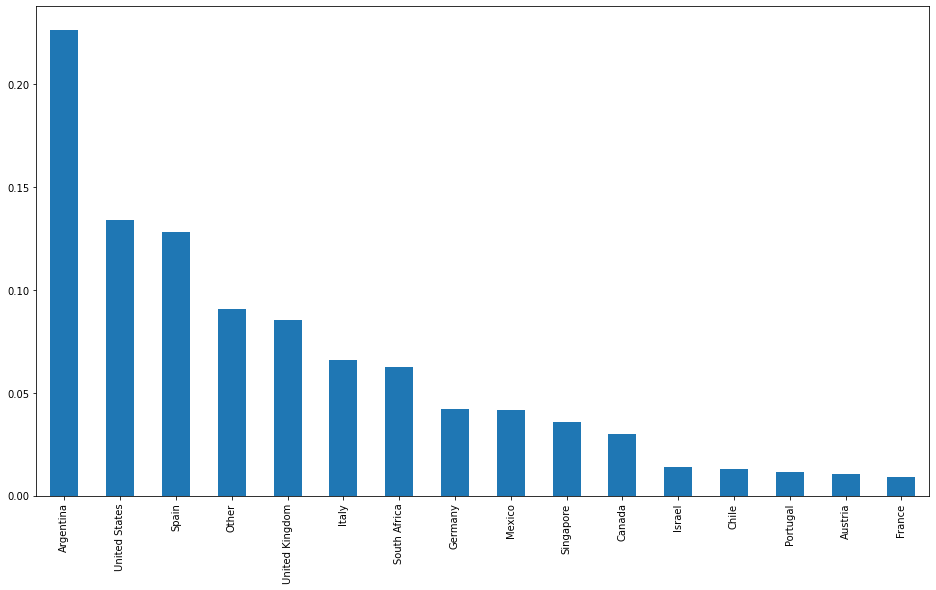

In [20]:
# Let's check the result
reviews_df_nonan['country'].value_counts(normalize=True).\
  plot(kind='bar', figsize=(16,9))
plt.show()

## Work on column 'reviewDate'

One thing to consider here: I have based my analysis on the data as-is.
But, is the reviewDate in local time (for the person posting the comment), or is it one timezone for all?
- Maybe it could be useful to convert that in local time to get a more meaningful indicator, using the country for instance.
- Or maybe is it already expressed in the local time (in which case, my indicator timeOfTheDay is relevant).

In [21]:
# Now, let's have a look at the 'reviewDate'
reviews_df_nonan.head()

,reviewText,brandCategory,country,reviewDate,likesCount,commentsCount
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elparaisodelosanimales,food,Argentina,2021-01-20 06:12:16.975,2.0,0
1,"No sé si es la más cremosa pero está rica. Tira a ser de las más caras pero para mi lo vale, está fortificada y eso está bueno. Yo la tomo con el ...",food,Argentina,2021-02-25 16:12:00.830,15.0,0
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,food,South Africa,2021-03-03 10:56:34.895,2.0,0
3,"Es una salsa más salada que picante, pero el picor es tenue y en general me pareció un sabor agradable. \n\n#vegan #elparaisodelosanimales #granji...",food,Mexico,2021-03-04 22:19:59.747,0.0,0
4,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk. #vegansmoothie #smoothie #abillio...,food,Singapore,2021-02-12 00:30:24.653,10.0,0


In [22]:
reviews_df_nonan['reviewDate'].min()

'2021-01-01 00:40:37.122'

In [23]:
reviews_df_nonan['reviewDate'].max()

'2021-03-31 23:18:59.587'

It looks like this data is quite old, ranging from January 1st 2021 and March 31th 2021.

### Days to a fixed date (let's say April 1st 2021) - recency

In [24]:
# Let's imagine that we're early April 2021 to engineer a new feature.
# I suppose the original analysis would have been made early April.
from datetime import datetime as dt

ref_date = dt.strptime('01/04/21', '%d/%m/%y')

In [25]:
# First, let's change the type of our column
reviews_df_nonan['reviewDate'] = pd.to_datetime(
    reviews_df_nonan['reviewDate'])

<ipython-input-25-c315208fbdbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_nonan['reviewDate'] = pd.to_datetime(


In [26]:
# Based on the 'ref_date', create a column with that constant value
reviews_df_nonan['referenceDay'] = pd.to_datetime(ref_date)

<ipython-input-26-0d203a474de8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_nonan['referenceDay'] = pd.to_datetime(ref_date)


In [27]:
# Now, let's create the delta between the reviewDate and the referenceDay
reviews_df_nonan['delta_days'] = (
    reviews_df_nonan['reviewDate'] - reviews_df_nonan['referenceDay']).\
      abs().dt.days + 1
# +1 because we're not thinking on a day as 24 hours
# Difference between March 31th 15:00:00 and referenceDay would be 0 without it.

<ipython-input-27-e1b8db7c953d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_nonan['delta_days'] = (


In [28]:
pd.set_option('max_colwidth', 75)
reviews_df_nonan.head()

,reviewText,brandCategory,country,reviewDate,likesCount,commentsCount,referenceDay,delta_days
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elpa...,food,Argentina,2021-01-20 06:12:16.975,2.0,0,2021-04-01,71
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,2021-02-25 16:12:00.830,15.0,0,2021-04-01,35
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2021-03-03 10:56:34.895,2.0,0,2021-04-01,29
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,2021-03-04 22:19:59.747,0.0,0,2021-04-01,28
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,2021-02-12 00:30:24.653,10.0,0,2021-04-01,48


In [29]:
# Let's create a function to create a recency indicator
# Values: Last_day, Last_week, Last_15days, Last_month, Last_quarter
def group_by_period(row):
  if row['delta_days'] < 2:
    res = 'Last_day'
  elif row['delta_days'] < 8:
    res = 'Last_week'
  elif row['delta_days'] < 16:
    res = 'Last_15days'
  elif row['delta_days'] < 32:
    res = 'Last_month'
  else:
    res = 'Last_quarter'
  
  return res

In [30]:
# Let's apply that
reviews_df_nonan['recencyReview'] = reviews_df_nonan.apply(group_by_period, 
                                                           axis=1)

<ipython-input-30-bb330d3c378f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_nonan['recencyReview'] = reviews_df_nonan.apply(group_by_period,


In [31]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,reviewDate,likesCount,commentsCount,referenceDay,delta_days,recencyReview
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elpa...,food,Argentina,2021-01-20 06:12:16.975,2.0,0,2021-04-01,71,Last_quarter
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,2021-02-25 16:12:00.830,15.0,0,2021-04-01,35,Last_quarter
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2021-03-03 10:56:34.895,2.0,0,2021-04-01,29,Last_month
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,2021-03-04 22:19:59.747,0.0,0,2021-04-01,28,Last_month
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,2021-02-12 00:30:24.653,10.0,0,2021-04-01,48,Last_quarter


In [32]:
# As it won't be used anywore, let's remove some created columns
reviews_df_nonan = reviews_df_nonan.drop(columns=['referenceDay', 'delta_days'])

### Time of the day

In [33]:
# Let's extract the hour the review was posted
reviews_df_nonan['hourOfDay'] = reviews_df_nonan['reviewDate'].dt.hour

In [34]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,reviewDate,likesCount,commentsCount,recencyReview,hourOfDay
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elpa...,food,Argentina,2021-01-20 06:12:16.975,2.0,0,Last_quarter,6
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,2021-02-25 16:12:00.830,15.0,0,Last_quarter,16
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2021-03-03 10:56:34.895,2.0,0,Last_month,10
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,2021-03-04 22:19:59.747,0.0,0,Last_month,22
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,2021-02-12 00:30:24.653,10.0,0,Last_quarter,0


In [35]:
# Let's create a function to regroup the hours as a time of the day
# Values: Morning, Noon, Afternoon, Evening, Night
def group_by_hour(row):
  if row['hourOfDay'] < 7:
    res = 'Night'
  elif row['hourOfDay'] < 12:
    res = 'Morning'
  elif row['hourOfDay'] < 14:
    res = 'Noon'
  elif row['hourOfDay'] < 18:
    res = 'Afternoon'
  elif row['hourOfDay'] < 23:
    res = 'Evening'
  else:
    res = 'Night'
  
  return res

In [36]:
# Let's apply that
reviews_df_nonan['reviewTimeOfDay'] = reviews_df_nonan.apply(group_by_hour, 
                                                             axis=1)

In [37]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,reviewDate,likesCount,commentsCount,recencyReview,hourOfDay,reviewTimeOfDay
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elpa...,food,Argentina,2021-01-20 06:12:16.975,2.0,0,Last_quarter,6,Night
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,2021-02-25 16:12:00.830,15.0,0,Last_quarter,16,Afternoon
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2021-03-03 10:56:34.895,2.0,0,Last_month,10,Morning
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,2021-03-04 22:19:59.747,0.0,0,Last_month,22,Evening
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,2021-02-12 00:30:24.653,10.0,0,Last_quarter,0,Night


In [38]:
# As it won't be used anywore, let's remove some columns
reviews_df_nonan = reviews_df_nonan.drop(columns=['reviewDate', 'hourOfDay'])

## Work on column 'reviewText'

### Hashtags

In [39]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elpa...,food,Argentina,2.0,0,Last_quarter,Night
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,15.0,0,Last_quarter,Afternoon
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2.0,0,Last_month,Morning
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,0.0,0,Last_month,Evening
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,10.0,0,Last_quarter,Night


#### Extract the hashtags as a new column

In [40]:
# Let's create a function to extract the hashtags from the text
import numpy as np

def extract_hashtags(row):
  res = []
  counter = 0

  for word in row['reviewText'].split():
    # Checking if the first character is '#', meaning it's a hashtag
    if word[0] == '#':
      # Adding the word itself to the list
      res.append(word[1:]) 
      counter += 1
  
  # If no hashtag found set returned value as NaN
  if counter == 0:
    res = np.NaN
    
  return res

In [41]:
# Let's apply that
reviews_df_nonan['hashtags'] = reviews_df_nonan.apply(extract_hashtags, axis=1)

In [42]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags
0,Margarina vegetal para preparar todo tipo de comidas\n #veganuary #elpa...,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]"
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,15.0,0,Last_quarter,Afternoon,NaN
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2.0,0,Last_month,Morning,NaN
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovega..."
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]"


#### Remove the hashtags from the reviewText

- Maybe only remove the '#' and leave the word in the text, as it can be part of a sentence, to consider. This would mean translate the hashtags as well.

In [43]:
# Let's remove the hashags from 'reviewText' while we're at it
def remove_hashtags(row):
  res = ''

  # If 'hashtags' is NaN then its type is float, otherwise its type is list
  if type(row['hashtags']) == float:
    res = row['reviewText']
  else:
    for word in row['reviewText'].split():
      # Adding the '1:' to not consider the '#'
      if word[1:] not in row['hashtags']:
        res += ' ' + word
  
    # Remove first space added
    res = res.lstrip()

  return res

In [44]:
# Let's apply that
reviews_df_nonan['reviewText'] = reviews_df_nonan.apply(remove_hashtags, axis=1)

In [45]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]"
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,15.0,0,Last_quarter,Afternoon,NaN
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2.0,0,Last_month,Morning,NaN
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovega..."
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]"


### Emojis

In [ ]:
# Try to detect emojis
# Extract emojis

## Language detection/translation

### Language detection

In [46]:
# First, let's detect the original language using the langdetect library
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=5f8254d01af98cbffc88a6bf1d9807276ddb3b984dc6b7ead1ccacafa47b67b6
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [47]:
# Let's create a function to detect the language for each row
from langdetect import detect, DetectorFactory
# To enforce consistency:
DetectorFactory.seed = 0

def detect_lang(row):
  # Try/except because I got errors and need to investigate that
  try:
    detected = detect(row['reviewText'])
  except:
    detected = 'error'

  return detected

In [48]:
# Let's apply that (~20/30s execution)
reviews_df_nonan['langOriginalReview'] = reviews_df_nonan.apply(detect_lang, 
                                                                axis=1)

In [49]:
# Now let's see what throws errors
reviews_df_nonan[reviews_df_nonan['langOriginalReview'] == 'error']

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview
705,....................................,food,Mexico,0.0,0,Last_quarter,Evening,[adioslacteos],error
877,......................................................,food,Argentina,0.0,0,Last_quarter,Afternoon,NaN,error
2330,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!,food,Israel,1.0,0,Last_month,Morning,NaN,error
4649,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!,food,Israel,1.0,0,Last_month,Afternoon,NaN,error


In [50]:
# That seems irrelevant, so let's remove these rows
reviews_df_nonan = reviews_df_nonan[
    reviews_df_nonan['langOriginalReview'] != 'error']

# Let's also reset the index
reviews_df_nonan.reset_index(drop=True, inplace=True)

In [51]:
reviews_df_nonan.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]",es
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,15.0,0,Last_quarter,Afternoon,NaN,es
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2.0,0,Last_month,Morning,NaN,en
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovega...",es
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]",en


In [52]:
# Let's see which languages do we have
reviews_df_nonan['langOriginalReview'].unique()

array(['es', 'en', 'de', 'it', 'he', 'pt', 'ca', 'fr', 'sk', 'et', 'nl',
       'id', 'af', 'no', 'cy', 'sl', 'ro'], dtype=object)

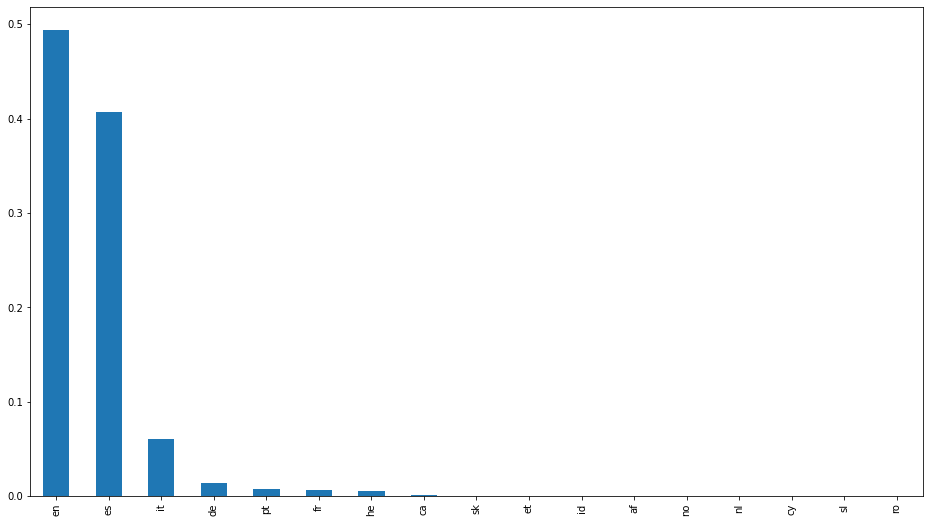

In [53]:
# Let's see their repartition
reviews_df_nonan['langOriginalReview'].value_counts(normalize=True).\
  plot(kind='bar', figsize=(16,9))
plt.show()

We see that the majority of comments are in english (almost 50%) and in spanish (around 40%). Then we have something like 6% of comments in italian, and the rest is split between other languages.

### Language translation

#### Using Googletrans

In [54]:
# Let's create a copy for this test
revs_ggl = reviews_df_nonan.copy()

In [55]:
# Let's now tranlsate that text to english using googletrans:
# https://pypi.org/project/googletrans/
# Have to specify the version since the default doesn't work.
# This is a known issue: https://github.com/ssut/py-googletrans/issues/354
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.5 MB 11.0 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17414 sha256=7b0903e5a97aa82fa35cb0048a5ea742c03e47ebf27c53c63e045a396aa11284
  Stored in directory: /root/.cache/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans


In [56]:
# Let's set the translator
from googletrans import Translator

translator = Translator()

In [57]:
# Let's create a function to translate to english

def translate_to_en(row):
  # Try/except to handle errors
  if row['langOriginalReview'] == 'en':
    translated = row['reviewText']
  else:
    try:
      # Arguments: src, dest
      translated = translator.translate(row['reviewText']).text
    except:
      translated = 'An error occured'

  return translated

In [58]:
# Let's apply that (~15 mins execution)
revs_ggl['translatedReview'] = revs_ggl.apply(translate_to_en, axis=1)

In [59]:
revs_ggl.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedReview
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]",es,Vegetable margarine to prepare all kinds of meals
1,No sé si es la más cremosa pero está rica. Tira a ser de las más caras ...,food,Argentina,15.0,0,Last_quarter,Afternoon,NaN,es,I don't know if it's the most creamy but it's rich.She pulls to be the ...
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a...,food,South Africa,2.0,0,Last_month,Morning,NaN,en,Really tasty crackers! Oven baked but with only 10 in a pack they are a...
3,"Es una salsa más salada que picante, pero el picor es tenue y en genera...",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovega...",es,"It is a sauce more salty than spicy, but the itching is dim and in gene..."
4,This was tasty. It has rich creamy flavour and its great when mixed wat...,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]",en,This was tasty. It has rich creamy flavour and its great when mixed wat...


In [60]:
# Let's see what caused some errors
pd.set_option('max_colwidth', 150)
revs_ggl[revs_ggl['translatedReview']=='An error occured']

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedReview
1042,"Una delicia!! Si les gusta el ajo, es la perfección. Para comer con galletitas de salvado, chips, o para usar como condimento, es realmente muy bu...",food,Argentina,2.0,0,Last_quarter,Evening,NaN,es,An error occured
1074,La rebajo en agua cuando pido sushi a domicilio,food,Spain,5.0,0,Last_quarter,Evening,[veganuary],es,An error occured
1099,Muy ricas y adictivas! Me encanta que se pueda conseguir en cualquier lado,food,Argentina,1.0,0,Last_week,Night,NaN,es,An error occured
1101,"Croquetas de heura, muy ricas, el rebozado es muy crujiente, por dentro son melosas pero las de jamón y queso lo son más. Pongo la misma foto que ...",food,Spain,4.0,0,Last_quarter,Evening,[veganuary],es,An error occured
1105,Me gusta esta opción y me resulta muy practico para cocinar,food,Argentina,0.0,0,Last_quarter,Night,NaN,es,An error occured
...,...,...,...,...,...,...,...,...,...,...
4730,"Proteína en una barrita, muy saludable, muy recomendado, delicioso!",food,Mexico,2.0,0,Last_quarter,Noon,NaN,es,An error occured
4748,"Riquísimo y una buena opción para todos. Me comí uno y sentí q me faltaba, acostumbrada a los alfajores de esta marca más pesados 😂",food,Argentina,1.0,0,Last_15days,Night,NaN,es,An error occured
4762,"Flan de dulce de leche, me encanta !",food,Argentina,2.0,0,Last_quarter,Night,[abillionlove],fr,An error occured
4763,Me encanta sobretodo fundido. Aunque me gustan más otros sabores de la misma marca. Pero no está nada mal para un sándwich o algo así,food,Spain,1.0,0,Last_15days,Afternoon,NaN,es,An error occured


~900 rows not translated is a lot, so let's try something else.

Sometimes it can be 'only' ~200 or 400 rows, this translator is unstable.

#### Using Deep-translator

In [61]:
# Let's create a copy for this test
revs_deept = reviews_df_nonan.copy()

In [62]:
# Let's now tranlsate that text to english using deep-translator:
# https://pypi.org/project/deep-translator/
!pip install -U deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 7.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [63]:
# Let's set the translator. There are various implemented:
# - GoogleTranslator
# - MicrosoftTranslator => requires api_key
# - PonsTranslator      =
# - LingueeTranslator   =
# - MyMemoryTranslator  =
# - YandexTranslator    => requires api_key
# - PapagoTranslator    => requires api_key
# - DeeplTranslator     => requires api_key
# - QcriTranslator      => requires api_key
# - LibreTranslator     => might require api_key
from deep_translator import GoogleTranslator

translator_ggl = GoogleTranslator()

In [64]:
# Let's create a function to translate to english

def google_to_en(row):
  # Try/except to handle errors
  if row['langOriginalReview'] == 'en':
    translated = row['reviewText']
  else:
    try:
      # Arguments: src, dest
      translated = translator_ggl.translate(row['reviewText'])
    except:
      translated = 'An error occured'

  return translated

In [65]:
# Let's apply that (~30 mins execution)
revs_deept['translatedGglReview'] = revs_deept.apply(google_to_en, axis=1)

In [66]:
revs_deept.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedGglReview
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]",es,Vegetable margarine to prepare all kinds of meals
1,"No sé si es la más cremosa pero está rica. Tira a ser de las más caras pero para mi lo vale, está fortificada y eso está bueno. Yo la tomo con el ...",food,Argentina,15.0,0,Last_quarter,Afternoon,NaN,es,"I don't know if it's the creamiest but it's rich. She tends to be one of the most expensive but for me it's worth it, she's fortified and that's g..."
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,food,South Africa,2.0,0,Last_month,Morning,NaN,en,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.
3,"Es una salsa más salada que picante, pero el picor es tenue y en general me pareció un sabor agradable.",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovegan, santuariosalvajes, libresalfin]",es,"It is a sauce that is more salty than spicy, but the heat is mild and overall I found it to be a pleasant flavor."
4,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]",en,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.


In [67]:
# Let's see what caused some errors
revs_deept[revs_deept['translatedGglReview']=='An error occured']

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedGglReview


##### Applying the translator

In [68]:
# That looks great! Let's apply this translator (~5 mins execution)
# First, let's copy the data
data = reviews_df_nonan.copy()

data['translatedReview'] = data.apply(google_to_en, axis=1)

In [69]:
data.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedReview
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]",es,Vegetable margarine to prepare all kinds of meals
1,"No sé si es la más cremosa pero está rica. Tira a ser de las más caras pero para mi lo vale, está fortificada y eso está bueno. Yo la tomo con el ...",food,Argentina,15.0,0,Last_quarter,Afternoon,NaN,es,"I don't know if it's the creamiest but it's rich. She tends to be one of the most expensive but for me it's worth it, she's fortified and that's g..."
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,food,South Africa,2.0,0,Last_month,Morning,NaN,en,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.
3,"Es una salsa más salada que picante, pero el picor es tenue y en general me pareció un sabor agradable.",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovegan, santuariosalvajes, libresalfin]",es,"It is a sauce that is more salty than spicy, but the heat is mild and overall I found it to be a pleasant flavor."
4,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]",en,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.


In [70]:
# Let's see what caused some errors
data[data['translatedReview']=='An error occured']

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedReview


## Insights

### Lemmatization



In [71]:
# First, let's copy the data
data_lem = data.copy()

In [72]:
# Let's use WordNetLemmatizer here
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import re

# Definition of the stopwords (to remove)
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [73]:
def text_preprocess(row):
  # Keep only characters (not the numbers)
  #main_words = re.sub('[^a-zA-Z0-9]', ' ', row['translatedReview'])
  main_words = re.sub('[^a-zA-Z]', ' ', row['translatedReview'])
  # Tokenization needs to be done on lower case
  main_words = (main_words.lower()).split()
  # Remove the stopwords
  main_words = [w for w in main_words if not w in stopwords]
  
  lem = WordNetLemmatizer()
  main_words = [lem.lemmatize(w) for w in main_words if len(w) > 1]
  
  main_words = ' '.join(main_words)

  return main_words

In [74]:
# Let's apply that
data_lem['lemmedReview'] = data_lem.apply(text_preprocess, axis=1)

In [75]:
data_lem.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedReview,lemmedReview
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]",es,Vegetable margarine to prepare all kinds of meals,vegetable margarine prepare kind meal
1,"No sé si es la más cremosa pero está rica. Tira a ser de las más caras pero para mi lo vale, está fortificada y eso está bueno. Yo la tomo con el ...",food,Argentina,15.0,0,Last_quarter,Afternoon,NaN,es,"I don't know if it's the creamiest but it's rich. She tends to be one of the most expensive but for me it's worth it, she's fortified and that's g...",know creamiest rich tends one expensive worth fortified good take coffee
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,food,South Africa,2.0,0,Last_month,Morning,NaN,en,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,really tasty cracker oven baked pack bit pricy good treat
3,"Es una salsa más salada que picante, pero el picor es tenue y en general me pareció un sabor agradable.",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovegan, santuariosalvajes, libresalfin]",es,"It is a sauce that is more salty than spicy, but the heat is mild and overall I found it to be a pleasant flavor.",sauce salty spicy heat mild overall found pleasant flavor
4,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]",en,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.,tasty rich creamy flavour great mixed water better blended soy milk


### Visualization with WordCloud

In [77]:
from wordcloud import WordCloud

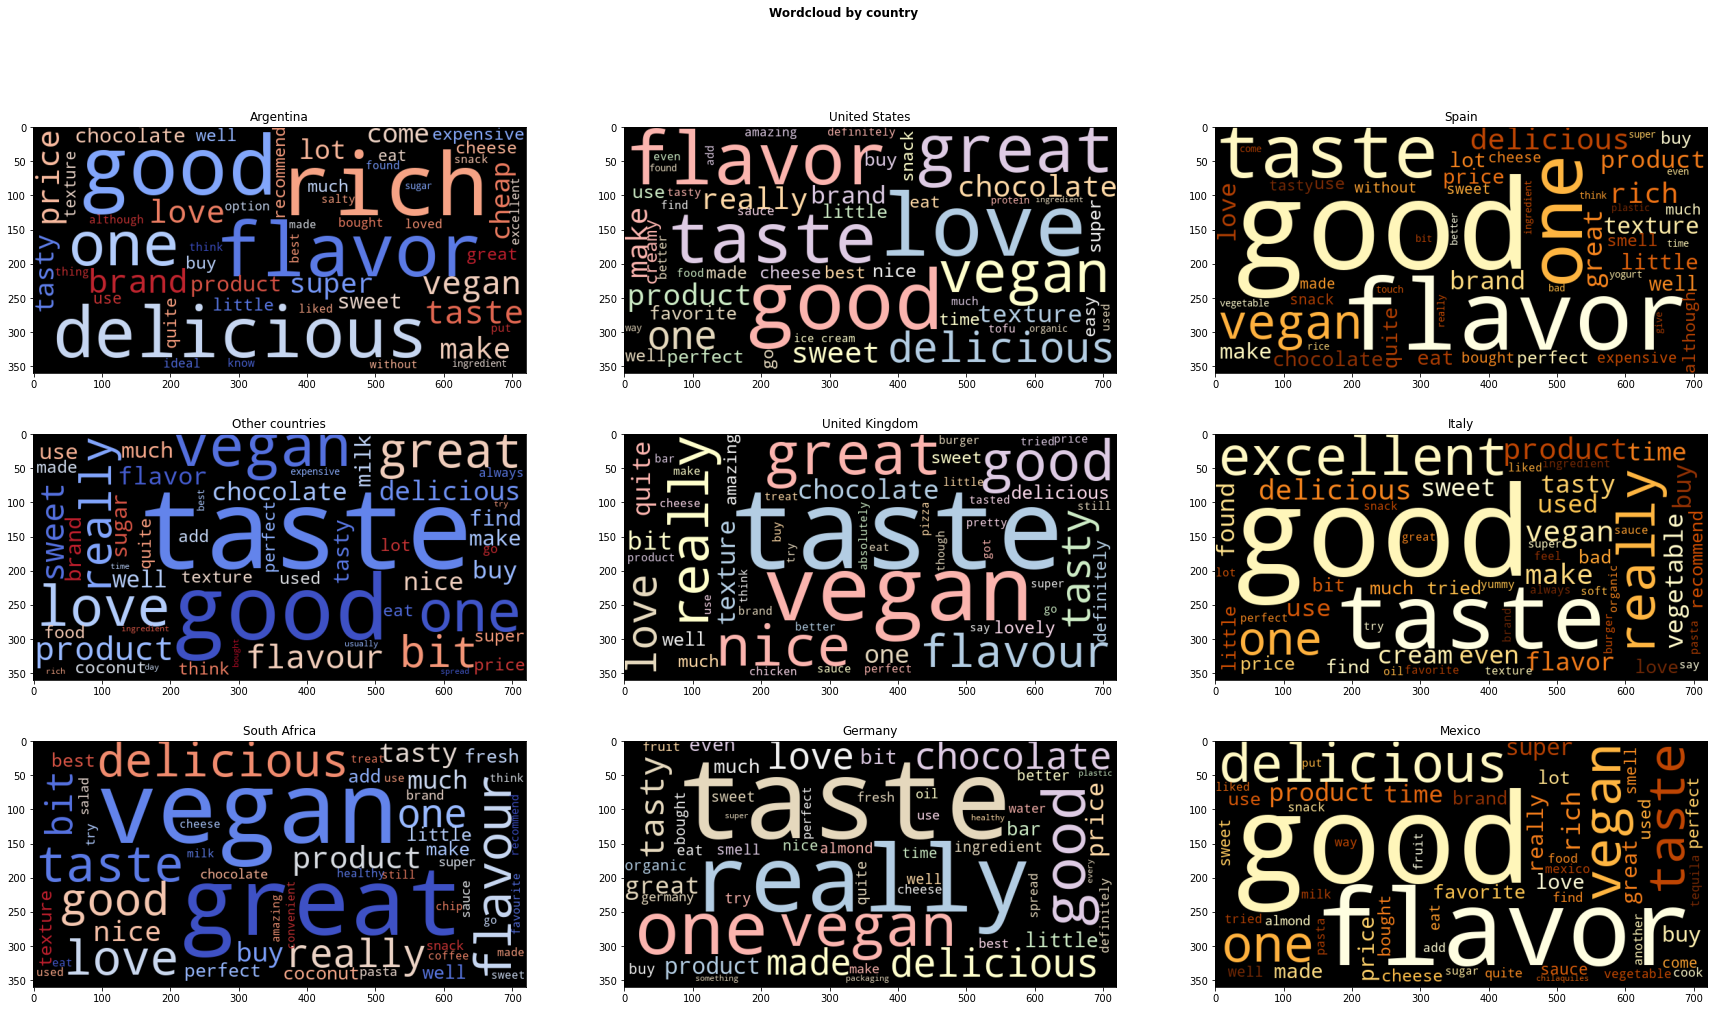

In [79]:
# Let's compare what they say for the 'main' countries

# First let's generate the corpuses
corpus_ar = ' '.join(
    word for word in data_lem[data_lem['country']=='Argentina'].\
    lemmedReview)
corpus_us = ' '.join(
    word for word in data_lem[data_lem['country']=='United States'].\
    lemmedReview)
corpus_sp = ' '.join(
    word for word in data_lem[data_lem['country']=='Spain'].\
    lemmedReview)
corpus_ot = ' '.join(
    word for word in data_lem[data_lem['country']=='Other'].\
    lemmedReview)
corpus_uk = ' '.join(
    word for word in data_lem[data_lem['country']=='United Kingdom'].\
    lemmedReview)
corpus_it = ' '.join(
    word for word in data_lem[data_lem['country']=='Italy'].\
    lemmedReview)
corpus_saf = ' '.join(
    word for word in data_lem[data_lem['country']=='South Africa'].\
    lemmedReview)
corpus_de = ' '.join(
    word for word in data_lem[data_lem['country']=='Germany'].\
    lemmedReview)
corpus_me = ' '.join(
    word for word in data_lem[data_lem['country']=='Mexico'].\
    lemmedReview)

# WordCloud generation
wc_ar = WordCloud(background_color='black', colormap='coolwarm', max_words=50, 
                    scale=1.8, random_state=23).generate(corpus_ar)
wc_us = WordCloud(background_color='black', colormap='Pastel1', max_words=50, 
                  scale=1.8, random_state=23).generate(corpus_us)
wc_sp = WordCloud(background_color='black', colormap='YlOrBr', max_words=50, 
                       scale=1.8, random_state=23).generate(corpus_sp)
wc_ot = WordCloud(background_color='black', colormap='coolwarm', max_words=50, 
                  scale=1.8, random_state=23).generate(corpus_ot)
wc_uk = WordCloud(background_color='black', colormap='Pastel1', max_words=50, 
                  scale=1.8, random_state=23).generate(corpus_uk)
wc_it = WordCloud(background_color='black', colormap='YlOrBr', max_words=50, 
                  scale=1.8, random_state=23).generate(corpus_it)
wc_saf = WordCloud(background_color='black', colormap='coolwarm', max_words=50, 
                   scale=1.8, random_state=23).generate(corpus_saf)
wc_de = WordCloud(background_color='black', colormap='Pastel1', max_words=50, 
                  scale=1.8, random_state=23).generate(corpus_de)
wc_me = WordCloud(background_color='black', colormap='YlOrBr', max_words=50, 
                  scale=1.8, random_state=23).generate(corpus_me)

# Let's plot that
fig, ax = plt.subplots(3, 3, figsize=(30,16))

ax[0, 0].imshow(wc_ar)
ax[0, 0].set_title('Argentina')
ax[0, 1].imshow(wc_us)
ax[0, 1].set_title('United States')
ax[0, 2].imshow(wc_sp)
ax[0, 2].set_title('Spain')
ax[1, 0].imshow(wc_ot)
ax[1, 0].set_title('Other countries')
ax[1, 1].imshow(wc_uk)
ax[1, 1].set_title('United Kingdom')
ax[1, 2].imshow(wc_it)
ax[1, 2].set_title('Italy')
ax[2, 0].imshow(wc_saf)
ax[2, 0].set_title('South Africa')
ax[2, 1].imshow(wc_de)
ax[2, 1].set_title('Germany')
ax[2, 2].imshow(wc_me)
ax[2, 2].set_title('Mexico')

fig.suptitle('Wordcloud by country', fontweight ='bold')
fig.show()

Not so much of a difference, we see the same words popping up.

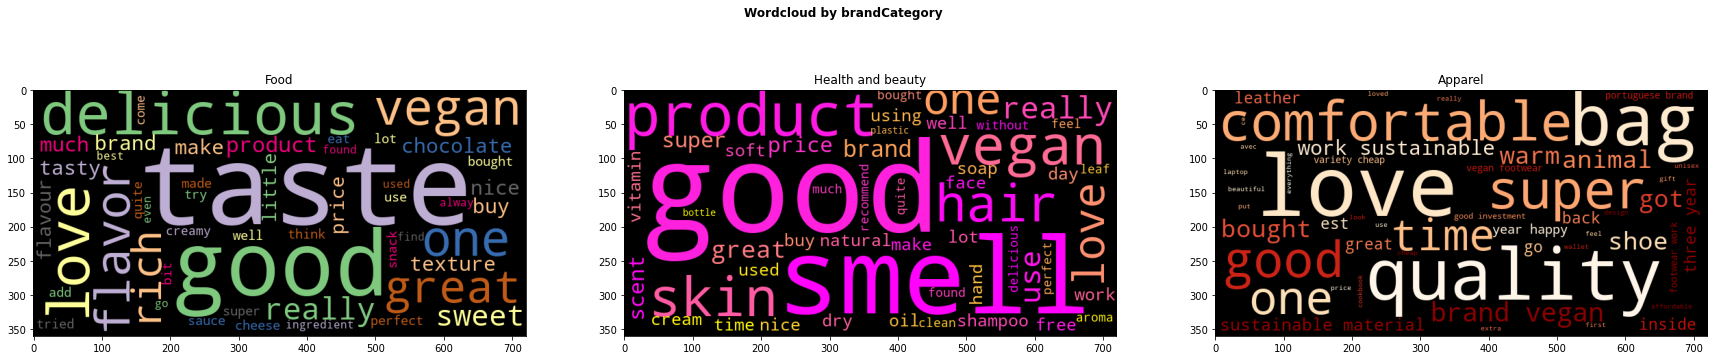

In [83]:
# Let's compare what they say for each brandCategory

# First let's generate the corpuses
corpus_food = ' '.join(
    word for word in data_lem[data_lem['brandCategory']=='food'].\
    lemmedReview)
corpus_healthBeauty = ' '.join(
    word for word in data_lem[data_lem['brandCategory']=='health and beauty'].\
    lemmedReview)
corpus_apparel = ' '.join(
    word for word in data_lem[data_lem['brandCategory']=='apparel'].\
    lemmedReview)

# WordCloud generation
wc_food = WordCloud(background_color='black', colormap='Accent', max_words=50, 
                    scale=1.8, random_state=23).generate(corpus_food)
wc_healthBeauty = WordCloud(background_color='black', colormap='spring', 
                            max_words=50, scale=1.8, random_state=23).\
                            generate(corpus_healthBeauty)
wc_apparel = WordCloud(background_color='black', colormap='OrRd', max_words=50, 
                       scale=1.8, random_state=23).generate(corpus_apparel)

# Let's plot that
fig, ax = plt.subplots(1, 3, figsize=(30,6))

ax[0].imshow(wc_food)
ax[0].set_title('Food')
ax[1].imshow(wc_healthBeauty)
ax[1].set_title('Health and beauty')
ax[2].imshow(wc_apparel)
ax[2].set_title('Apparel')

fig.suptitle('Wordcloud by brandCategory', fontweight ='bold')
fig.show()

This could also be split by country, to see if there is a difference.

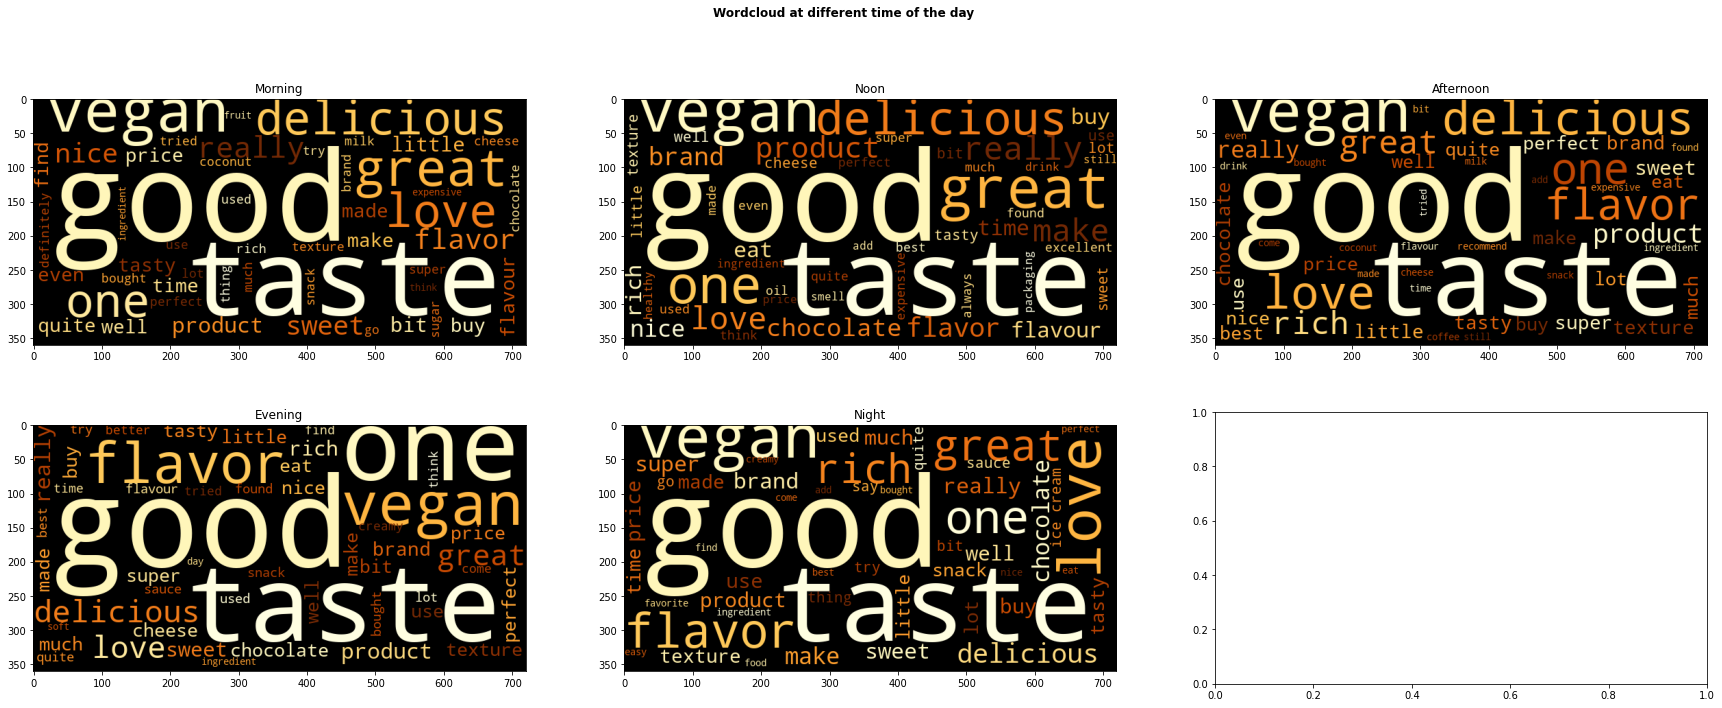

In [84]:
# Let's compare what they say for each time of the day

# First let's generate the corpuses
corpus_morning = ' '.join(
    word for word in data_lem[data_lem['reviewTimeOfDay']=='Morning'].\
    lemmedReview)
corpus_noon = ' '.join(
    word for word in data_lem[data_lem['reviewTimeOfDay']=='Noon'].\
    lemmedReview)
corpus_afternoon = ' '.join(
    word for word in data_lem[data_lem['reviewTimeOfDay']=='Afternoon'].\
    lemmedReview)
corpus_evening = ' '.join(
    word for word in data_lem[data_lem['reviewTimeOfDay']=='Evening'].\
    lemmedReview)
corpus_night = ' '.join(
    word for word in data_lem[data_lem['reviewTimeOfDay']=='Night'].\
    lemmedReview)

# WordCloud generation
wc_morning = WordCloud(background_color='black', colormap='YlOrBr', 
                       max_words=50, scale=1.8, random_state=23).\
                       generate(corpus_morning)
wc_noon = WordCloud(background_color='black', colormap='YlOrBr', max_words=50, 
                    scale=1.8, random_state=23).generate(corpus_noon)
wc_afternoon = WordCloud(background_color='black', colormap='YlOrBr', 
                         max_words=50, scale=1.8, random_state=23).\
                         generate(corpus_afternoon)
wc_evening = WordCloud(background_color='black', colormap='YlOrBr', 
                       max_words=50, scale=1.8, random_state=23).\
                       generate(corpus_evening)
wc_night = WordCloud(background_color='black', colormap='YlOrBr', max_words=50, 
                     scale=1.8, random_state=23).generate(corpus_night)

# Let's plot that
fig, ax = plt.subplots(2, 3, figsize=(30,11))

ax[0, 0].imshow(wc_morning)
ax[0, 0].set_title('Morning')
ax[0, 1].imshow(wc_noon)
ax[0, 1].set_title('Noon')
ax[0, 2].imshow(wc_afternoon)
ax[0, 2].set_title('Afternoon')
ax[1, 0].imshow(wc_evening)
ax[1, 0].set_title('Evening')
ax[1, 1].imshow(wc_night)
ax[1, 1].set_title('Night')

fig.suptitle('Wordcloud at different time of the day', fontweight ='bold')
fig.show()

Not much to gather here.

Overall, it is rather positive. People seem to be sharing what they like.

### Vectorization and visualization

In [85]:
# First, create a copy of the data
data_viz = data_lem.copy()

In [86]:
data_viz.head()

,reviewText,brandCategory,country,likesCount,commentsCount,recencyReview,reviewTimeOfDay,hashtags,langOriginalReview,translatedReview,lemmedReview
0,Margarina vegetal para preparar todo tipo de comidas,food,Argentina,2.0,0,Last_quarter,Night,"[veganuary, elparaisodelosanimales]",es,Vegetable margarine to prepare all kinds of meals,vegetable margarine prepare kind meal
1,"No sé si es la más cremosa pero está rica. Tira a ser de las más caras pero para mi lo vale, está fortificada y eso está bueno. Yo la tomo con el ...",food,Argentina,15.0,0,Last_quarter,Afternoon,NaN,es,"I don't know if it's the creamiest but it's rich. She tends to be one of the most expensive but for me it's worth it, she's fortified and that's g...",know creamiest rich tends one expensive worth fortified good take coffee
2,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,food,South Africa,2.0,0,Last_month,Morning,NaN,en,Really tasty crackers! Oven baked but with only 10 in a pack they are a bit pricy!\nGood for a treat.,really tasty cracker oven baked pack bit pricy good treat
3,"Es una salsa más salada que picante, pero el picor es tenue y en general me pareció un sabor agradable.",food,Mexico,0.0,0,Last_month,Evening,"[vegan, elparaisodelosanimales, granjitatyh, animallibre, santuariovegan, santuariosalvajes, libresalfin]",es,"It is a sauce that is more salty than spicy, but the heat is mild and overall I found it to be a pleasant flavor.",sauce salty spicy heat mild overall found pleasant flavor
4,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.,food,Singapore,10.0,0,Last_quarter,Night,"[vegansmoothie, smoothie, abillionlove]",en,This was tasty. It has rich creamy flavour and its great when mixed water and better when blended with soy milk.,tasty rich creamy flavour great mixed water better blended soy milk


In [87]:
# Let's apply a tf-idf vectorizer to our data
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=4, sublinear_tf=True)
# Apply to text, and save the results in an array
X = vectorizer.fit_transform(data_lem['lemmedReview'])

In [88]:
X.shape

(4783, 3342)

In [89]:
# Now let's try to group the data using KMeans
from sklearn.cluster import KMeans

# Initialize kmeans with 4 centroids
# (after various tries, that's what I think is best here)
kmeans = KMeans(n_clusters=4, random_state=23)
# Fit the model
kmeans.fit(X)
# Store cluster labels in a variable
clusters = kmeans.labels_

In [90]:
# Now, let's try to visualize the data using a PCA
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2, random_state=23)
# Pass X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# Save the two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [91]:
# Let's add all that to the data
data_viz['clusters'] = clusters
data_viz['x0'] = x0
data_viz['x1'] = x1

In [92]:
# Let's create a function to identify the top keywords of each cluster
def get_top_keywords(n_terms):
  # Group the vectors by cluster
  df = pd.DataFrame(X.todense()).groupby(clusters).mean()
  # Get the terms
  terms = vectorizer.get_feature_names_out()
  for i, r in df.iterrows():
    print('\nCluster {}'.format(i))
    # For each row, find the n terms that have the highest td idf score
    print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(10)


Cluster 0
super,sweet,taste,flavor,one,tasty,great,rich,vegan,delicious

Cluster 1
taste,product,vegan,chocolate,flavor,one,good,delicious,great,love

Cluster 2
good flavor,good price,taste good,product,really good,really,price,taste,flavor,good

Cluster 3
chocolate,good,vegan,much,one,really like,taste like,really,taste,like


In [93]:
# Let's now map the cluster to some identified labels 
cluster_map = {0:'Product', 1:'Quality', 2:'Taste', 3:'Flavor'}
# Apply the labels
data_viz['clusters'] = data_viz['clusters'].map(cluster_map)

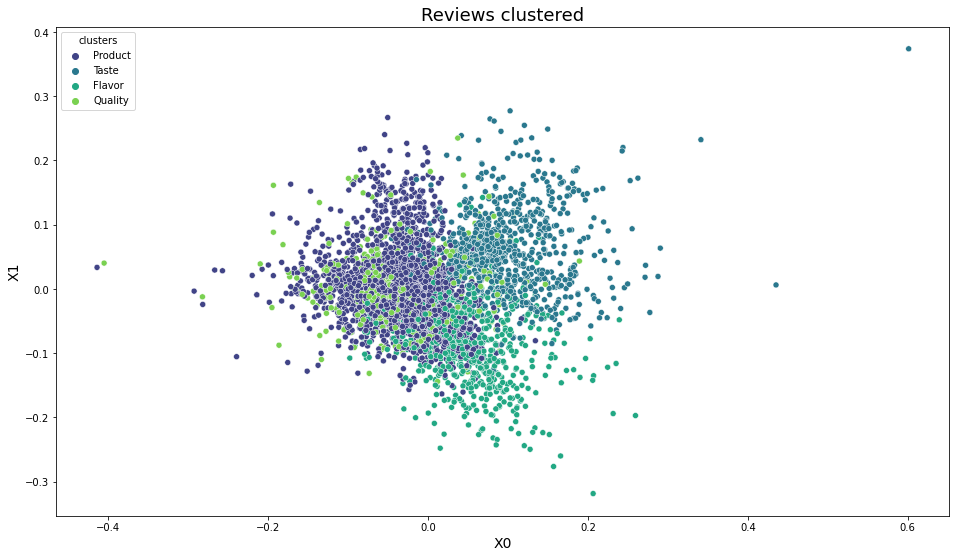

In [94]:
# Finally, let's plot that using seaborn
import seaborn as sns

# General parameters
plt.figure(figsize=(16, 9))
plt.title('Reviews clustered', fontdict={'fontsize': 18})
plt.xlabel('X0', fontdict={'fontsize': 14})
plt.ylabel('X1', fontdict={'fontsize': 14})
# Plot
sns.scatterplot(data=data_viz, x='x0', y='x1', hue='clusters', 
                palette='viridis')
plt.show()

These topics are bound together, and it is not easy to generate clear clusters. More data would be helpful to the model.

In [95]:
# Let's try with a t-SNE instead (~1 min)
Xm = X.todense() 
from sklearn.manifold import TSNE

embeddings = TSNE(n_components=2, perplexity=30, n_iter=2000, init='pca', 
                  random_state=23)

tsne_res = embeddings.fit_transform(Xm)

# Je stocke ces résultats
data_tsne = pd.DataFrame(tsne_res[:,0:2], columns=['tsne1', 'tsne2'])

# On affiche la dimension de ce dataset
print(data_tsne.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(4783, 2)


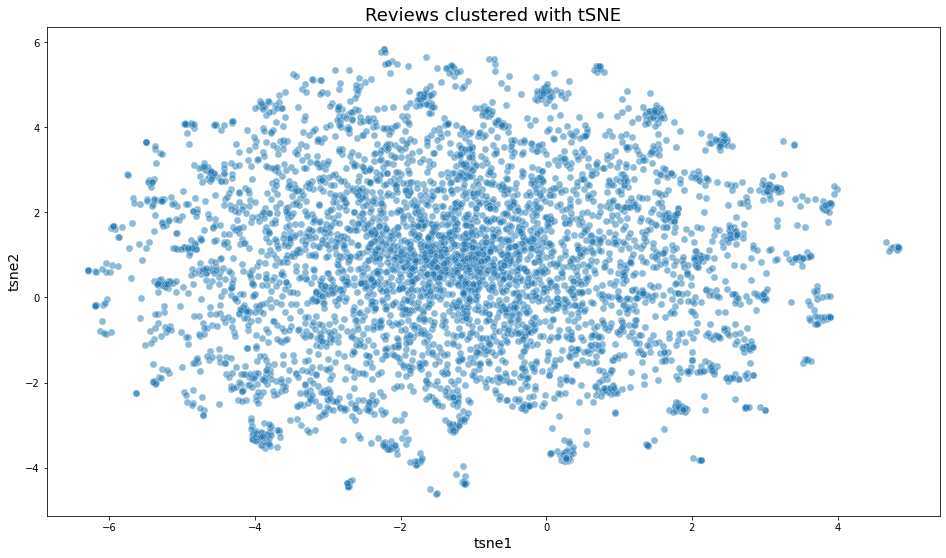

In [96]:
# Let's plot that
# General parameters
plt.figure(figsize=(16, 9))
plt.title('Reviews clustered with tSNE', fontdict={'fontsize': 18})
plt.xlabel('tsne1', fontdict={'fontsize': 14})
plt.ylabel('tsne2', fontdict={'fontsize': 14})

# Création du nuage de points, colorisé par class
sns.scatterplot(x='tsne1', y='tsne2', data=data_tsne, 
                palette=sns.color_palette('tab10'), s=50, alpha=0.5)
plt.show()

Does not seem easy to identify clusters here.

In [97]:
# Let's try a topic detection with LDA

# First, let's create a function to display the topics
def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print('Topic {}:'.format(topic_idx))
    print(' '.join(
        [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Set the number of top words to display
no_top_words = 10

# Creation of the LDA model
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics: 5
lda = LatentDirichletAllocation(n_components=5, random_state=23)

# Let's apply on the data
lda.fit(Xm)

# Finally, print the topics
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Topic 0:
good taste really like delicious milk texture tasty price nice
Topic 1:
good love delicious flavor like rich vegan product time expensive
Topic 2:
good like taste great love one flavor rich delicious vegan
Topic 3:
like cream tasty vegan flavor ice good great ice cream really
Topic 4:
one vegan delicious chocolate good favorite recommend love product hair


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [98]:
#Uncomment next line and remove this line to get the running packages
#pip freeze

# Section B - New features / features enhancement

**Answer**  
An interesting feature would be:
- to be able to filter the marketplace by user (or specified) location. I come across products from Spain for instance (Mango cheesecake), that might not be easy to deliver to me. Even if that was, I'm not so sure that the delivery would be good for the planet. SOLUTION: in the same way that there is a location attached to a user in the feed, either allow a user to specify a location when posting in the marketplace, or by default add its location to the product.
- in the same branch, filter the reviews/comments by language. SOLUTION: this can be done via a tool that detects the language. There are many APIs available online (from Google, Microsoft, Deepl, etc) that could be used for that. Even for a translation.
- for posts with a lot of comments, hide them all by default, and only display only some of the most popular or recent, otherwise that makes the scrolling not so pleasant. For instance, the ongoing post from abillion about the 'do 10 get 10' has a lot of comments, and you have to scroll a long time to get to the next post: usually you see all the comments when you show some interest in the post (by clicking on it for instance, or on a 'Load more' button). SOLUTION: add a 'Load more' button to show them all.